In [29]:
# ==========================================================
# KLASIFIKASI IRIS DENGAN KNN + SMOTE + EVALUASI LENGKAP
# ==========================================================

import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
from imblearn.over_sampling import SMOTE

In [30]:
# ----------------------------------------------------------
# 1️⃣ LOAD & EKSPLORASI DATA (Soal 1)
# ----------------------------------------------------------
# a. Load dataset dari file csv
data = pd.read_csv("iris.csv")

# Tampilkan data dalam bentuk tabel (seperti Excel)
print("=== 1️⃣ LOAD DATASET: TAMPILAN TABEL DATA ===")
display(data.head(10)) # Menampilkan 10 baris pertama dengan format tabel Excel
print("\n")

# b. Tampilkan Informasi (Jumlah data & fitur, Nama fitur, Distribusi target)
print("=== EKSPLORASI DATA ===")
print(f"Jumlah Total Data  : {data.shape[0]}")
print(f"Jumlah Total Fitur : {data.shape[1] - 1}")
print(f"Nama Fitur         : {data.columns[:-1].tolist()}")

# Encoding target agar bisa diolah secara numerik
le = LabelEncoder()
data['species_encoded'] = le.fit_transform(data['species'])

print(f"Distribusi kelas target:\n{data['species'].value_counts()}")

# c. Penjelasan Singkat (Teori)
# Potensi masalah: Imbalance (dominasi kelas), Skala Fitur (rentang nilai berbeda),
# dan Outliers (pencilan) yang dapat mengganggu akurasi algoritma KNN.
print("-" * 30)

=== 1️⃣ LOAD DATASET: TAMPILAN TABEL DATA ===


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa




=== EKSPLORASI DATA ===
Jumlah Total Data  : 150
Jumlah Total Fitur : 4
Nama Fitur         : ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Distribusi kelas target:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
------------------------------


In [31]:
# ----------------------------------------------------------
# 2️⃣ PREPROCESSING (Soal 2)
# ----------------------------------------------------------
X = data.drop(['species', 'species_encoded'], axis=1)
y = data['species_encoded']

# Handling Imbalance dengan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# a. Bagi dataset menjadi training (70%) dan testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=42)

# b. Feature scaling menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=== 2️⃣ PREPROCESSING SELESAI ===")
print(f"Data Training (setelah SMOTE): {len(X_train)}")
print(f"Data Testing  (setelah SMOTE): {len(X_test)}")
print("-" * 30)

=== 2️⃣ PREPROCESSING SELESAI ===
Data Training (setelah SMOTE): 105
Data Testing  (setelah SMOTE): 45
------------------------------


=== 3️⃣ EVALUASI MODEL KNN ===
Waktu Training: 0.0196 detik
Accuracy  : 1.00
Precision : 1.00
Recall    : 1.00
F1-score  : 1.00
AUC Score : 1.00
------------------------------


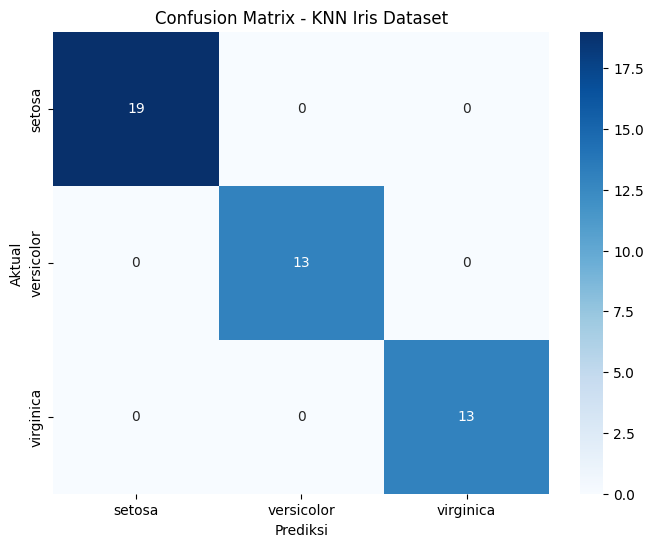


=== 5️⃣ INPUT MANUAL UNTUK PREDIKSI BARU ===
Masukkan Sepal Length (cm): 5.1
Masukkan Sepal Width (cm) : 3.5
Masukkan Petal Length (cm): 1.4
Masukkan Petal Width (cm) : 0.2

Hasil Prediksi: Bunga tersebut terdeteksi sebagai spesies **SETOSA**


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [32]:
# ----------------------------------------------------------
# 3️⃣ IMPLEMENTASI MODEL KNN (Soal 3)
# ----------------------------------------------------------
# a. Inisialisasi model KNN dengan k=5
model_knn = KNeighborsClassifier(n_neighbors=5)

# b. Latih model (Training) dan Lakukan Prediksi
start_time = time.time()
model_knn.fit(X_train_scaled, y_train)
y_pred = model_knn.predict(X_test_scaled)
y_prob = model_knn.predict_proba(X_test_scaled)
end_time = time.time()

# c. Hitung Accuracy, Precision, Recall, F1-score
print("=== 3️⃣ EVALUASI MODEL KNN ===")
print(f"Waktu Training: {end_time - start_time:.4f} detik")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision : {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall    : {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-score  : {f1_score(y_test, y_pred, average='weighted'):.2f}")

# Menghitung AUC Score
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(f"AUC Score : {auc:.2f}")
print("-" * 30)

# ----------------------------------------------------------
# 4️⃣ VISUALISASI CONFUSION MATRIX
# ----------------------------------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - KNN Iris Dataset')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# ----------------------------------------------------------
# 5️⃣ PREDIKSI DATA INPUT MANUAL
# ----------------------------------------------------------
print("\n=== 5️⃣ INPUT MANUAL UNTUK PREDIKSI BARU ===")
try:
    s_len = float(input("Masukkan Sepal Length (cm): "))
    s_wid = float(input("Masukkan Sepal Width (cm) : "))
    p_len = float(input("Masukkan Petal Length (cm): "))
    p_wid = float(input("Masukkan Petal Width (cm) : "))

    input_data = scaler.transform([[s_len, s_wid, p_len, p_wid]])
    hasil_angka = model_knn.predict(input_data)
    hasil_spesies = le.inverse_transform(hasil_angka)[0]

    print(f"\nHasil Prediksi: Bunga tersebut terdeteksi sebagai spesies **{hasil_spesies.upper()}**")
except Exception as e:
    print(f"Kesalahan input: {e}. Pastikan menggunakan angka dan titik (.) untuk desimal.")